In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [4]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ROOT

Welcome to JupyROOT 6.14/04


In [5]:
from array import array
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile, TPaveText
MyTree = ROOT.TTree( 'tree1', 'tree para un par de dados' )
dado1 = array( 'i', [ 0 ] )
dado2 = array( 'i', [ 0 ] )
dado2p= array("f", [0])
MyTree.Branch( 'dado 1', dado1, 'dado1/I' )
MyTree.Branch( 'dado 2', dado2, 'dado2/I' )
MyTree.Branch("dado 2 primado", dado2p, "dado2p/F")


import random
from random import randint

#Para generar varias semillas automaticamente
for i in range(1000): 
  dado1[0] = randint(1,6)
  dado2[0] = randint(1,6)
  MyTree.Fill()


#con numeros aleatorios completamos el dado2
for j in range(1000):
  MyTree.GetEntry(j)
  random.seed(MyTree.dado2)
  dado2p[0]= randint(1,6)
  MyTree.Fill()

"""
N =  MyTree.GetEntries()
for i in range(N):
    MyTree.GetEntry(i)
    print (MyTree.dado2)
"""








'\nN =  MyTree.GetEntries()\nfor i in range(N):\n    MyTree.GetEntry(i)\n    print (MyTree.dado2)\n'

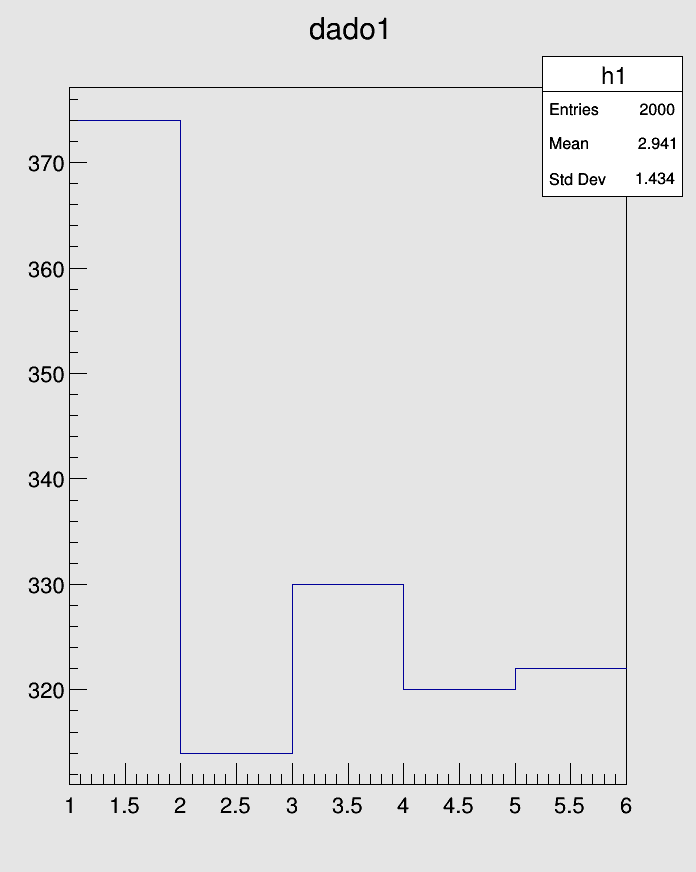

In [6]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
MyTree.Draw("dado1>>h1(5,1,6)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


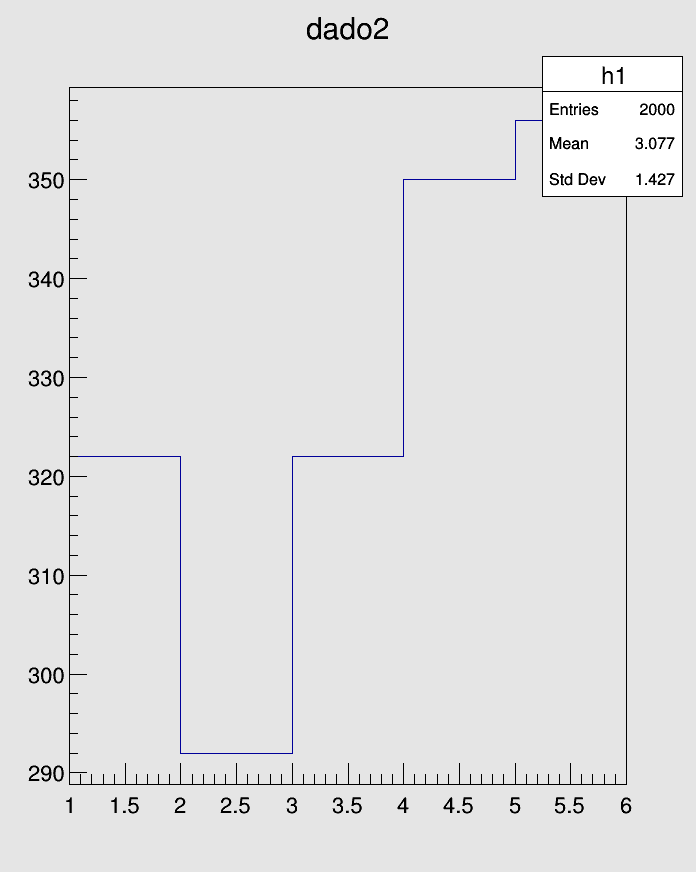

In [7]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
MyTree.Draw("dado2>>h1(5,1,6)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

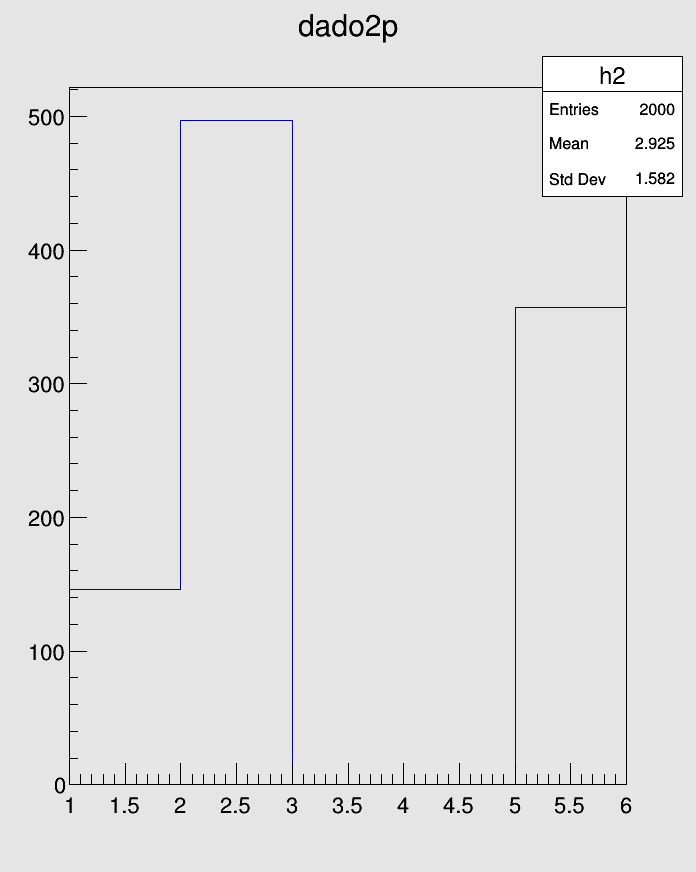

In [8]:
MyTree.Draw("dado2p>>h2(5,1,6)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()


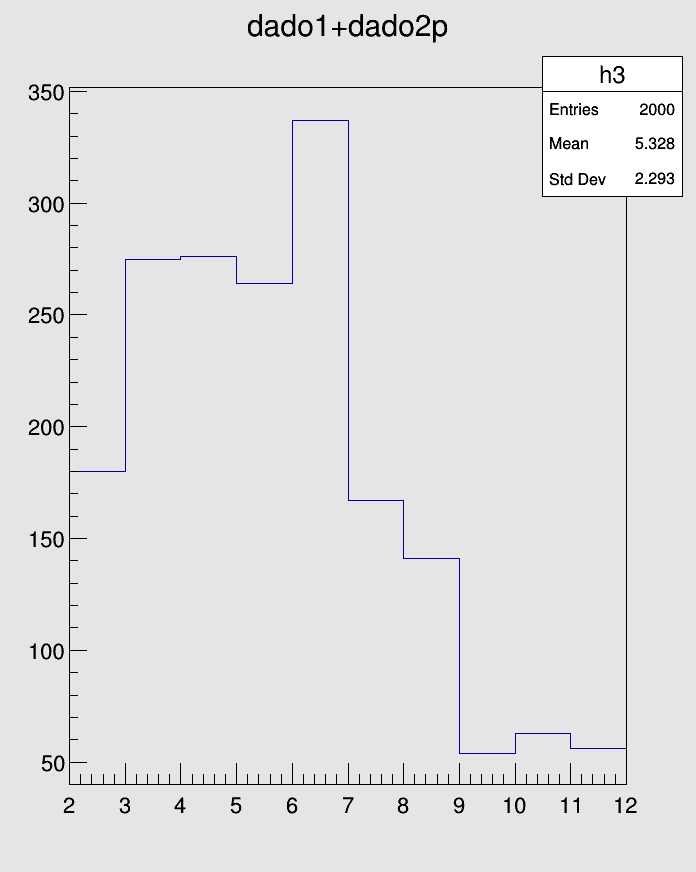

In [9]:
MyTree.Draw("dado1+dado2p>>h3(10,2,12)")
c1.Update()
gROOT.GetListOfCanvases().Draw()